**Importing** **Librabries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Loading** **Dataset**

In [2]:
data= pd.read_csv('/content/train_loan.csv')

**Data** **Preprocessing**

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
#dropping loan ID
data=data.drop(["Loan_ID"],axis=1)

Missing Values Handling

In [8]:
data.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
data['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [10]:
#filling missing values with mode
mode_gender = data['Gender'].mode()[0]
data['Gender'].fillna(value=mode_gender, inplace=True)

In [11]:
data['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

<Axes: xlabel='Self_Employed', ylabel='count'>

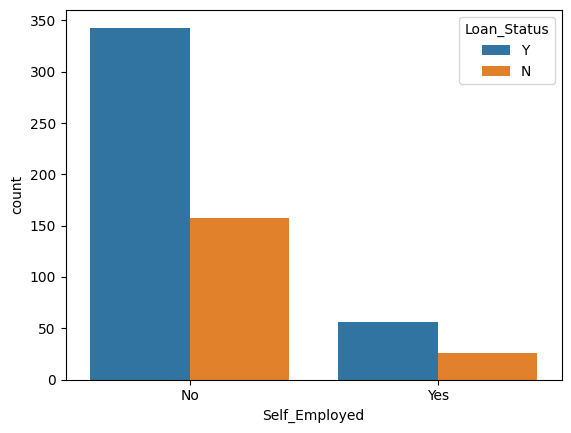

In [12]:
#graph self_employed vs loan_status

sns.countplot(x = 'Self_Employed', hue = 'Loan_Status', data = data)


In [13]:
# cross tab for self_employed value affect loan_status and percentage  of those values

cross_tab = pd.crosstab(data['Self_Employed'], data['Loan_Status'])
percentage = cross_tab.div(cross_tab.sum(axis=1), axis=0)

print("Cross Tabulation:")
print(cross_tab)
print("\nPercentage:")
print(percentage)


Cross Tabulation:
Loan_Status      N    Y
Self_Employed          
No             157  343
Yes             26   56

Percentage:
Loan_Status           N         Y
Self_Employed                    
No             0.314000  0.686000
Yes            0.317073  0.682927


In [14]:
#filling missing values with mode
mode_Self_Employed = data['Self_Employed'].mode()[0]
data['Self_Employed'].fillna(value=mode_Self_Employed, inplace=True)

In [15]:
#Pivot table for Gender and Marriage
table1 = data.pivot_table(values='Married', index='Gender', aggfunc=lambda x: x.map({'Yes':1, 'No':0}).mean())
table1

,Married
Gender,
Female,0.279279
Male,0.734000


In [16]:
# function to fill Married missing values with Yes if male and No if female
def f1(x):
    if x['Gender'] == 'Male':
        return 'Yes'
    else:
        return 'No'

data['Married'].fillna(data[data['Married'].isnull()].apply(f1,axis=1), inplace=True)

In [17]:
data['Dependents'].value_counts(normalize=True)

0     0.575960
1     0.170284
2     0.168614
3+    0.085142
Name: Dependents, dtype: float64

In [18]:
table2 = data.pivot_table(values='Loan_Status',index='Dependents', columns='Married', aggfunc=len)
table2

Married,No,Yes
Dependents,,
0,171,174
1,23,79
2,8,93
3+,7,44


In [19]:
# function to fill Dependents missing values with 0 if not married and 1, 2, or 3+ if married
import random
def f2(x):
    if x['Married'] == 'No':
        return 0
    else:
        return random.choice(['1', '2', '3+'])

data['Dependents'].fillna(data[data['Dependents'].isnull()].apply(f2,axis=1), inplace=True)

In [20]:
# loan amount
data['Loan_Amount_Term'].value_counts(normalize=True)

360.0    0.853333
180.0    0.073333
480.0    0.025000
300.0    0.021667
240.0    0.006667
84.0     0.006667
120.0    0.005000
60.0     0.003333
36.0     0.003333
12.0     0.001667
Name: Loan_Amount_Term, dtype: float64

In [21]:
data['Loan_Amount_Term'].fillna(360, inplace=True)

In [22]:
# creating a pivot table to provide us the median values for all groups of Education and Self_Employed
table = data.pivot_table(values='LoanAmount', index='Self_Employed', columns='Education', aggfunc=np.median)

# a function to return the value of the pivot table
def f3(x):
    return table.loc[x['Self_Employed'], x['Education']]

# replacing missing values of Loan Amount with the median value of each groups (as per the frequency table below)
data['LoanAmount'].fillna(data[data['LoanAmount'].isnull()].apply(f3, axis=1), inplace=True)
print(table)

Education      Graduate  Not Graduate
Self_Employed                        
No                130.0         113.0
Yes               157.5         130.0


In [23]:
# creating a count and a pivot table for loan status and credit history

temp1 = data['Credit_History'].value_counts(ascending=True)
temp2 = data.pivot_table(values='Loan_Status', index=['Credit_History'], aggfunc=lambda x:
x.map({'Y':1, 'N':0}).mean())

print('Frequency Table for Credit History:')
print(temp1)

print('\nProbability of getting loan for each Credit History class:')
print(temp2)

Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probability of getting loan for each Credit History class:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


In [24]:
# filling missing values in Credit_History with '1.0' if Loan_Status is 'Y' and '0.0' if Loan_Status is 'N'

def fill_credit_history(row):
  if row['Loan_Status'] == 'Y':
    return 1.0
  elif row['Loan_Status'] == 'N':
    return 0.0
  else:
    return row['Credit_History']

data['Credit_History'] = data.apply(fill_credit_history, axis=1)

In [25]:
data.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

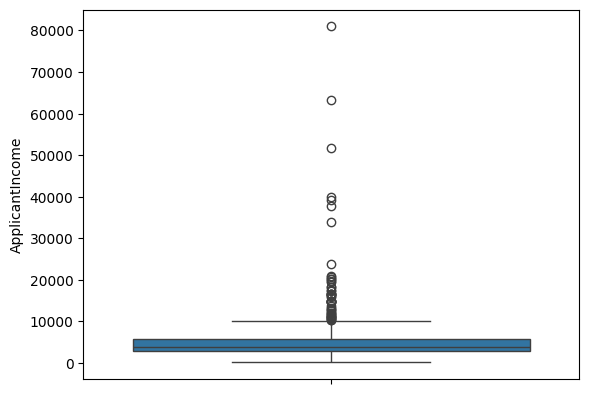

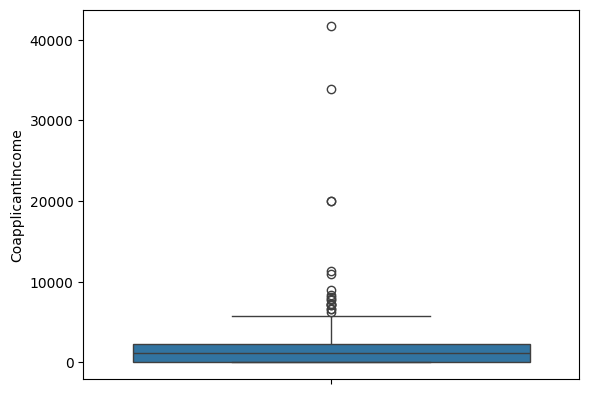

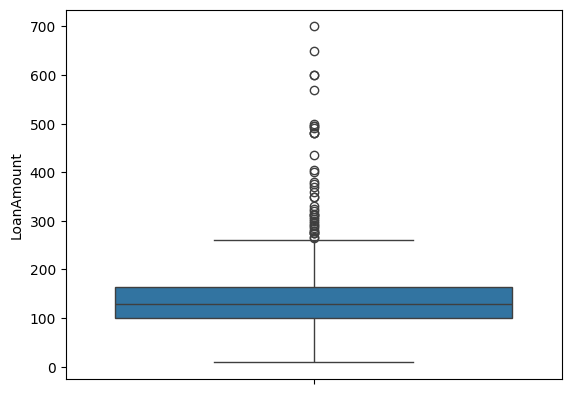

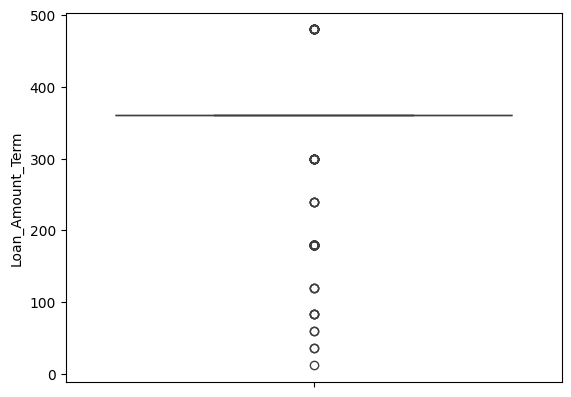

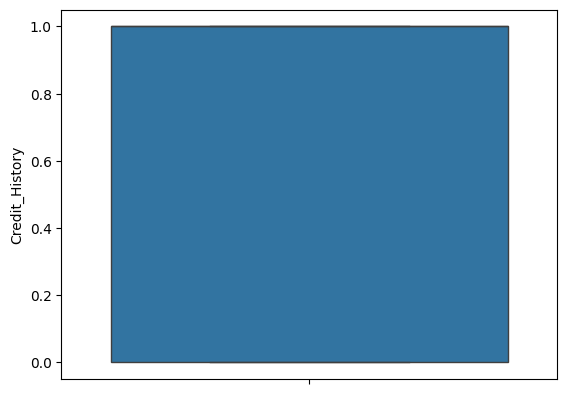

In [31]:
# Get list of numeric columns
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_columns:
  sns.boxplot(y=col, data=data)
  plt.show()


In [33]:
#  handleing outliers in 'ApplicantIncome' by replacing higher values with upper bound  and lower values with lower bound

# Outlier Treatment for ApplicantIncome
Q1 = data['ApplicantIncome'].quantile(0.25)
Q3 = data['ApplicantIncome'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with upper and lower bounds
data['ApplicantIncome'] = np.where(
    data['ApplicantIncome'] > upper_bound,
    upper_bound,
    np.where(data['ApplicantIncome'] < lower_bound, lower_bound, data['ApplicantIncome'])
)


In [34]:
# handling outliers in 'CoapplicantIncome' by replacing higher values with upper bound  and lower values with lower bound

# Outlier Treatment for CoapplicantIncome
Q1 = data['CoapplicantIncome'].quantile(0.25)
Q3 = data['CoapplicantIncome'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with upper and lower bounds
data['CoapplicantIncome'] = np.where(
    data['CoapplicantIncome'] > upper_bound,
    upper_bound,
    np.where(data['CoapplicantIncome'] < lower_bound, lower_bound, data['CoapplicantIncome'])
)


In [35]:
# handling outliers in 'LoanAmount' by replacing higher values with upper bound  and lower values with lower bound

# Outlier Treatment for LoanAmount
Q1 = data['LoanAmount'].quantile(0.25)
Q3 = data['LoanAmount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with upper and lower bounds
data['LoanAmount'] = np.where(
    data['LoanAmount'] > upper_bound,
    upper_bound,
    np.where(data['LoanAmount'] < lower_bound, lower_bound, data['LoanAmount'])
)


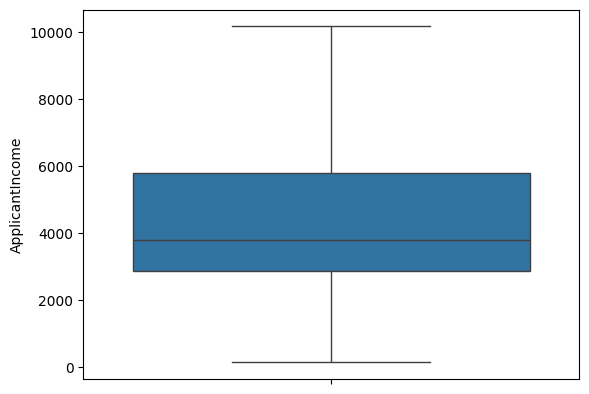

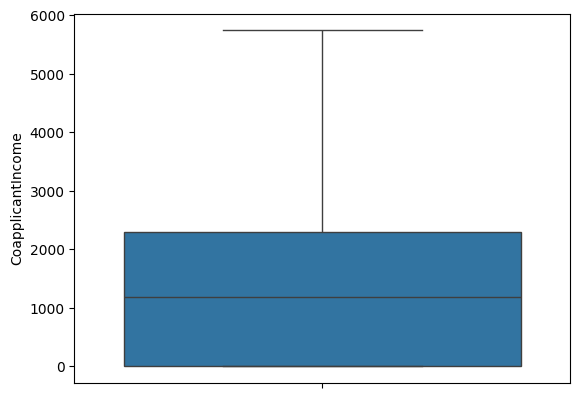

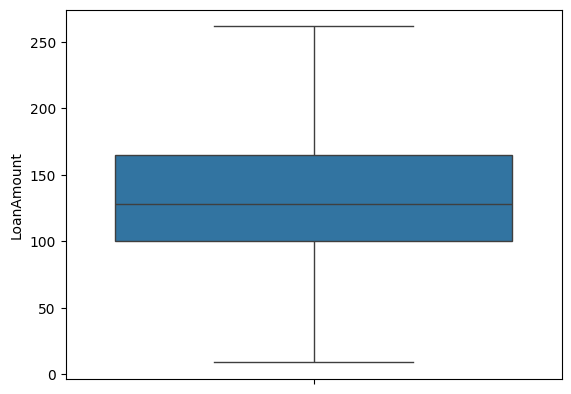

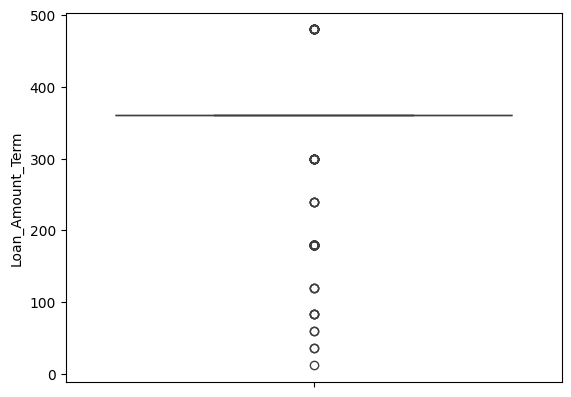

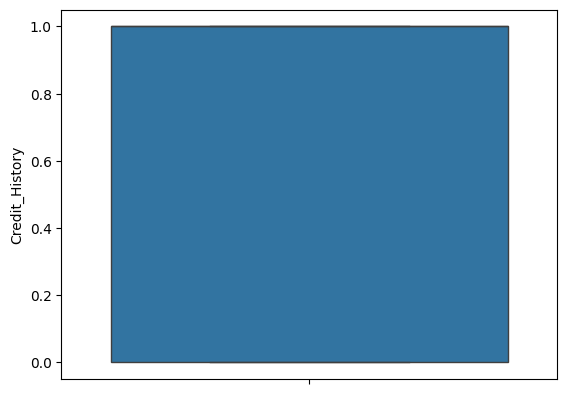

In [36]:
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_columns:
  sns.boxplot(y=col, data=data)
  plt.show()

In [37]:
# replace '3+' with 3 and change the datatype into integer
data['Dependents'].replace(['3+'], 3, inplace=True)
data['Dependents'] = data['Dependents'].astype(int)

**Encoding**

In [40]:
# encoding categorical variables as numerical values (e.g. male is 1)
from sklearn.preprocessing import LabelEncoder

variableMod = ['Gender', 'Married','Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
le = LabelEncoder()

for i in variableMod:
    data[i] = le.fit_transform(data[i])

data.dtypes

Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [41]:
data.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849.00,0.000,130.0,360.0,1.0,2,1
1,1,1,1,0,0,4583.00,1508.000,128.0,360.0,0.0,0,0
2,1,1,0,0,1,3000.00,0.000,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583.00,2358.000,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000.00,0.000,141.0,360.0,1.0,2,1
5,1,1,2,0,1,5417.00,4196.000,261.5,360.0,1.0,2,1
6,1,1,0,1,0,2333.00,1516.000,95.0,360.0,1.0,2,1
7,1,1,3,0,0,3036.00,2504.000,158.0,360.0,0.0,1,0
8,1,1,2,0,0,4006.00,1526.000,168.0,360.0,1.0,2,1
9,1,1,1,0,0,10171.25,5743.125,261.5,360.0,0.0,1,0


**Spliting Dataset**

In [42]:
x=data.drop(['Loan_Status'],axis=1)
y=data.Loan_Status

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

Decision Tree

In [44]:
from sklearn.tree import DecisionTreeClassifier
clf= DecisionTreeClassifier()
clf=clf.fit(x_train,y_train)

In [45]:
y_pred = clf.predict(x_test)

In [46]:
from sklearn.metrics import accuracy_score
print('Accuracy=', accuracy_score(y_test,y_pred))

Accuracy= 1.0


Bagging

In [47]:
from sklearn.ensemble import BaggingClassifier
tree= DecisionTreeClassifier()

In [48]:
bagging_clf= BaggingClassifier(estimator= tree,n_estimators=100, random_state=42)
bagging_clf.fit(x_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=42)

In [49]:
y_pred_bg = bagging_clf.predict(x_test)
print('Accuracy=', accuracy_score(y_test,y_pred))

Accuracy= 1.0


In [50]:
#bagging using svc as  estimator
from sklearn.svm import SVC
bagging_clf_SV= BaggingClassifier(estimator=SVC(),n_estimators=100, random_state=42)
bagging_clf_SV.fit(x_train,y_train)
y_pred_bg = bagging_clf_SV.predict(x_test)
print('Accuracy=', accuracy_score(y_test,y_pred))

Accuracy= 1.0


RandomForest

In [51]:
from sklearn.ensemble import RandomForestClassifier
rf_clf= RandomForestClassifier(n_estimators=100, random_state=42)

In [52]:
rf_clf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [54]:
y_pred = clf.predict(x_test)
print('Accuracy=', accuracy_score(y_test,y_pred))

Accuracy= 1.0


AdaBoost

In [55]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(n_estimators=100)
ada_clf.fit(x_train,y_train)
y_pred_ada = ada_clf.predict(x_test)

In [56]:
accuracy_score(y_test,y_pred_ada)

1.0

Gradient Boosting

In [57]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf= GradientBoostingClassifier(n_estimators=100, max_depth=3,random_state=42)
gb_clf.fit(x_train,y_train)
y_pred_gb = gb_clf.predict(x_test)
accuracy_score(y_test,y_pred_gb)

1.0

XGBoost

In [58]:
import xgboost as xgb
xgb_clf= xgb.XGBClassifier()
xgb_clf.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [59]:
y_pred_xgb= xgb_clf.predict(x_test)
accuracy_score(y_test,y_pred_xgb)

1.0